<a href="https://colab.research.google.com/github/rsekola/Financial_inclusion_dataset.csv/blob/main/Point_de_contr%C3%B4le_du_r%C3%A9seau_neuronal_profond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

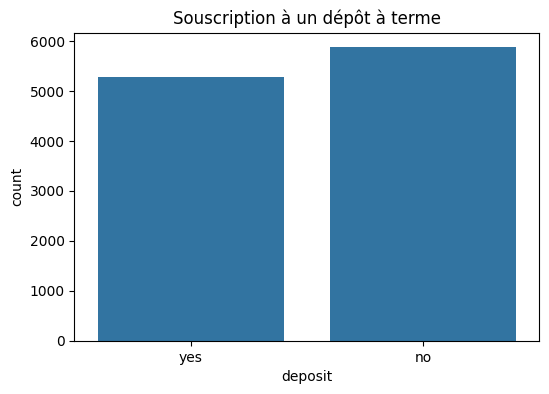

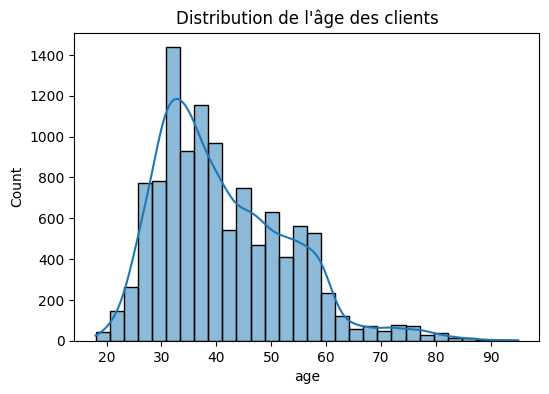

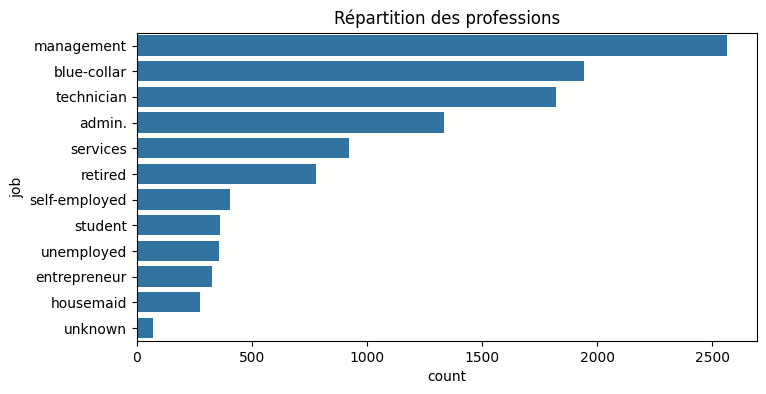

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import correct du jeu de données (séparateur = ,)
df = pd.read_csv("/content/bank.csv")

# Analyse initiale
print(df.head())
print(df.info())
print(df.describe(include="all"))

# Visualisations initiales
plt.figure(figsize=(6,4))
sns.countplot(x="deposit", data=df)
plt.title("Souscription à un dépôt à terme")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribution de l'âge des clients")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(y="job", data=df, order=df["job"].value_counts().index)
plt.title("Répartition des professions")
plt.show()



In [4]:
# Nettoyage des données

# Suppression des doublons
df = df.drop_duplicates()

# Gestion des valeurs manquantes
df = df.dropna()

# Suppression des valeurs "unknown"
cols_unknown = ["job", "education", "contact", "poutcome"]
for col in cols_unknown:
    df = df[df[col] != "unknown"]

# Conversion des types
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Vérification finale
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 2675 entries, 890 to 11160
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2675 non-null   int64 
 1   job        2675 non-null   object
 2   marital    2675 non-null   object
 3   education  2675 non-null   object
 4   default    2675 non-null   object
 5   balance    2675 non-null   int64 
 6   housing    2675 non-null   object
 7   loan       2675 non-null   object
 8   contact    2675 non-null   object
 9   day        2675 non-null   int64 
 10  month      2675 non-null   object
 11  duration   2675 non-null   int64 
 12  campaign   2675 non-null   int64 
 13  pdays      2675 non-null   int64 
 14  previous   2675 non-null   int64 
 15  poutcome   2675 non-null   object
 16  deposit    2675 non-null   object
dtypes: int64(7), object(10)
memory usage: 376.2+ KB
None
     age           job  marital  education default  balance housing loan  \
890   42        admi

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Encodage des variables catégorielles
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Séparation des variables X et y
X = df_encoded.drop("deposit", axis=1)
y = df_encoded["deposit"]

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Réseau de neurones
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compilation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Entraînement
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Évaluation
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5832 - loss: 0.6658 - val_accuracy: 0.7407 - val_loss: 0.5364
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7738 - loss: 0.5062 - val_accuracy: 0.7850 - val_loss: 0.4840
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8157 - loss: 0.4586 - val_accuracy: 0.7944 - val_loss: 0.4678
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8169 - loss: 0.4359 - val_accuracy: 0.8084 - val_loss: 0.4630
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8243 - loss: 0.4183 - val_accuracy: 0.8014 - val_loss: 0.4576
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8380 - loss: 0.4143 - val_accuracy: 0.8014 - val_loss: 0.4536
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8525 - loss: 0.3891 - val_accuracy: 0.7967 - val_loss: 0.4539
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.3920 - val_accuracy: 0.8014 - val_loss: 0.4497
Epo